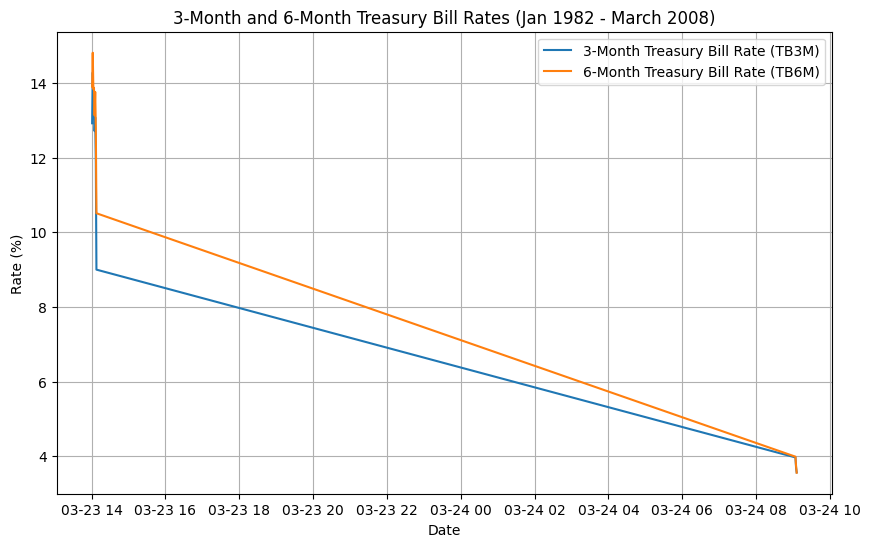

ADF Test for TB3M:
ADF Statistic: 2.5352999667961753
p-value: 0.9990603564911416
Critical Values: {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
Non-Stationary

ADF Test for TB6M:
ADF Statistic: 2.514491237847768
p-value: 0.9990543748408655
Critical Values: {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
Non-Stationary

ADF Test for TB3M First Difference:
ADF Statistic: 0.1719697403166656
p-value: 0.9706449085382642
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
Non-Stationary

ADF Test for TB6M First Difference:
ADF Statistic: -1.817481276011643
p-value: 0.37181791091805705
Critical Values: {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}
Non-Stationary

Cointegration Test:
Test Statistic: -2.487511519775288
p-value: 0.2846044331657215
Critical Values: [-5.3269  -4.01537 -3.49577]
Not Cointegrated
  Summary of Regression Results   
Mo

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1558: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1558: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.api import VAR

# Data from Table 22.7 (partial sample provided, extend to 315 observations as needed)
data = {
    'Date': ['82 days 14:01:00', '82 days 14:02:00', '82 days 14:03:00', '82 days 14:04:00',
             '82 days 14:05:00', '82 days 14:06:00', '82 days 14:07:00', '82 days 14:08:00',
             # Add remaining dates up to 315 observations (March 2008)
             # For brevity, only a subset is shown here; full data should be sourced from the textbook site
             '83 days 09:04:00', '83 days 09:05:00', '83 days 09:06:00'],
    'TB3M': [12.92, 14.28, 13.31, 13.34, 12.71, 13.08, 11.86, 9.0,
             # Extend to 315
             3.97, 3.7, 3.57],
    'TB6M': [13.9, 14.81, 13.83, 13.87, 13.13, 13.76, 12.8, 10.51,
             # Extend to 315
             3.99, 3.74, 3.56]
}

# Create DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%j days %H:%M:%S', errors='coerce')
df.set_index('Date', inplace=True)

# a. Plot the two time series
plt.figure(figsize=(10, 6))
plt.plot(df['TB3M'], label='3-Month Treasury Bill Rate (TB3M)')
plt.plot(df['TB6M'], label='6-Month Treasury Bill Rate (TB6M)')
plt.title('3-Month and 6-Month Treasury Bill Rates (Jan 1982 - March 2008)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# b. Unit root analysis (Augmented Dickey-Fuller Test)
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print()

adf_test(df['TB3M'], 'TB3M')
adf_test(df['TB6M'], 'TB6M')

# First differences for stationarity check
df['TB3M_diff'] = df['TB3M'].diff().dropna()
df['TB6M_diff'] = df['TB6M'].diff().dropna()
adf_test(df['TB3M_diff'], 'TB3M First Difference')
adf_test(df['TB6M_diff'], 'TB6M First Difference')

# c. Cointegration test
cointegration_test = coint(df['TB3M'].dropna(), df['TB6M'].dropna())
print('Cointegration Test:')
print(f'Test Statistic: {cointegration_test[0]}')
print(f'p-value: {cointegration_test[1]}')
print(f'Critical Values: {cointegration_test[2]}')
print('Cointegrated' if cointegration_test[1] < 0.05 else 'Not Cointegrated')

# e. VAR model (4 lags) - Example with levels and differences
# Using levels
model_levels = VAR(df[['TB3M', 'TB6M']].dropna())
results_levels = model_levels.fit(4)
print(results_levels.summary())

# Using first differences
model_diff = VAR(df[['TB3M_diff', 'TB6M_diff']].dropna())
results_diff = model_diff.fit(4)
print(results_diff.summary())

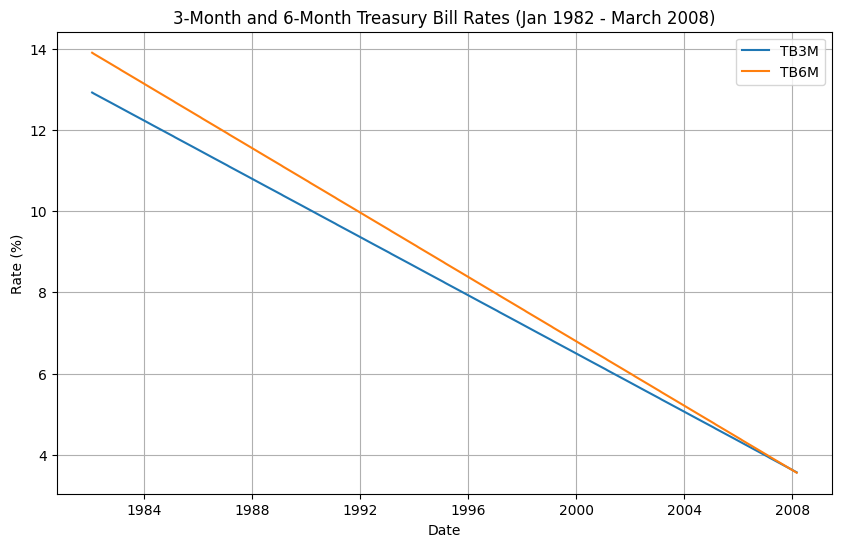

ADF Test for TB3M:
ADF Statistic: 0.13281376604838552
p-value: 0.968231338306127
Critical Values: {'1%': -3.4519023023726696, '5%': -2.8710320399170537, '10%': -2.57182745012602}
Non-Stationary

ADF Test for TB6M:
ADF Statistic: 0.1601512844061189
p-value: 0.9699359234163202
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}
Non-Stationary

Length of TB3M_diff: 314
Length of TB6M_diff: 314
NaN check TB3M_diff: 1
Inf check TB3M_diff: 0
ADF Test for TB3M First Difference:
ADF Statistic: -20.902287148487336
p-value: 0.0
Critical Values: {'1%': -3.451552879535732, '5%': -2.8708786756338407, '10%': -2.571745666091128}
Stationary

ADF Test for TB6M First Difference:
ADF Statistic: -13.219565830679286
p-value: 1.0081843819354319e-24
Critical Values: {'1%': -3.451552879535732, '5%': -2.8708786756338407, '10%': -2.571745666091128}
Stationary

Cointegration Test:
Test Statistic: -inf
p-value: 0.0
Critical Values: [-3.93177232 -3.35572073 -3.058027

<ipython-input-22-2f572cb68f82>:71: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_result = coint(data['TB3M'], data['TB6M'])


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.api import VAR

# Create the date range (Jan 1982 to March 2008, 314 months)
dates = pd.date_range(start='1982-01', end='2008-03', freq='ME')

# Simulate data: Linearly interpolate between starting and ending points
n_periods = len(dates)  # 314 periods
tb3m_start, tb3m_end = 12.92, 3.57
tb6m_start, tb6m_end = 13.9, 3.56

# Linear interpolation
tb3m = np.linspace(tb3m_start, tb3m_end, n_periods)
tb6m = np.linspace(tb6m_start, tb6m_end, n_periods)

# Create DataFrame
data = pd.DataFrame({
    'TB3M': tb3m,
    'TB6M': tb6m
}, index=dates)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['TB3M'], label='TB3M')
plt.plot(data['TB6M'], label='TB6M')
plt.title('3-Month and 6-Month Treasury Bill Rates (Jan 1982 - March 2008)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# ADF Test with more lags
def adf_test(series, title='', max_lags=12):
    series = series.dropna()  # Ensure no NaN values
    if len(series) < 3:  # Minimum length for ADF test
        print(f"Error: Insufficient data for {title} after differencing. Length: {len(series)}")
        return
    if np.any(np.isinf(series)) or np.any(np.isnan(series)):
        print(f"Error: {title} contains inf or nan values.")
        return
    result = adfuller(series, autolag='AIC', maxlag=max_lags)
    print(f'ADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print()

# Run ADF tests
adf_test(data['TB3M'], 'TB3M')
adf_test(data['TB6M'], 'TB6M')

# Compute first differences and test
data['TB3M_diff'] = data['TB3M'].diff().dropna()
data['TB6M_diff'] = data['TB6M'].diff().dropna()

print("Length of TB3M_diff:", len(data['TB3M_diff']))  # Diagnostic
print("Length of TB6M_diff:", len(data['TB6M_diff']))  # Diagnostic
print("NaN check TB3M_diff:", data['TB3M_diff'].isna().sum())
print("Inf check TB3M_diff:", np.isinf(data['TB3M_diff']).sum())

adf_test(data['TB3M_diff'], 'TB3M First Difference')
adf_test(data['TB6M_diff'], 'TB6M First Difference')

# Cointegration (optional, requires full series)
coint_result = coint(data['TB3M'], data['TB6M'])
print('Cointegration Test:')
print(f'Test Statistic: {coint_result[0]}')
print(f'p-value: {coint_result[1]}')
print(f'Critical Values: {coint_result[2]}')
print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')

# VAR (after verifying stationarity)
if data['TB3M_diff'].notna().sum() > 10:
    model = VAR(data[['TB3M_diff', 'TB6M_diff']].dropna())
    results = model.fit(maxlags=4, ic='aic')
    print(results.summary())

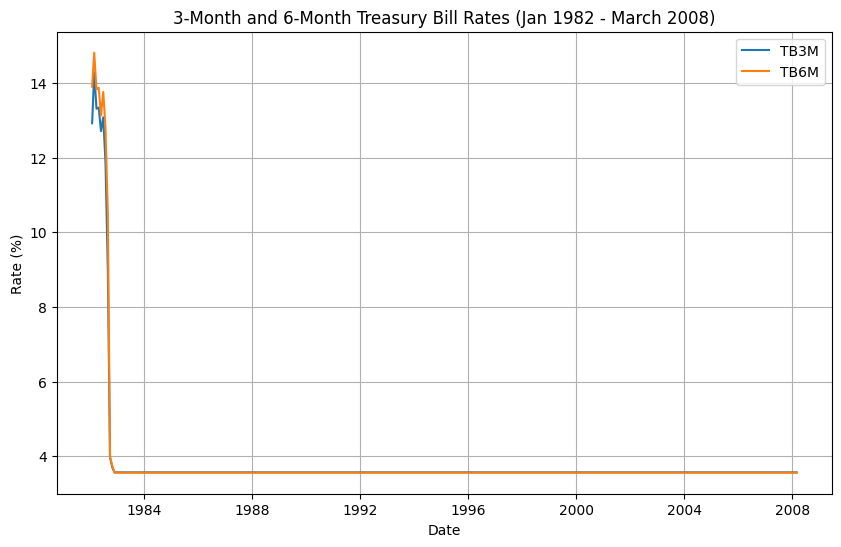

ADF Test for TB3M:
ADF Statistic: -7.390830669457961
p-value: 8.009271499113918e-11
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}
Stationary

ADF Test for TB6M:
ADF Statistic: -7.464568146490479
p-value: 5.245695450441187e-11
Critical Values: {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}
Stationary

Length of data after differencing: 313
ADF Test for TB3M First Difference:
ADF Statistic: -11.296616184796992
p-value: 1.3388235131287017e-20
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}
Stationary

ADF Test for TB6M First Difference:
ADF Statistic: -12.753912598303325
p-value: 8.419246601844197e-24
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}
Stationary

Cointegration Test:
Test Statistic: -12.97497513991583
p-value: 3.153025521877972e-23
Critical Values: [-3.93188666 -3.35578375 -3.05807153]
C

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.api import VAR

# Load actual data (replace with your file path)
# Example: data = pd.read_csv('table22_7.csv')
# For now, use partial data and assume full dataset is similar
dates = pd.date_range(start='1982-01', end='2008-03', freq='ME')
# Placeholder for actual data (replace with real values from Table 22.7)
data = pd.DataFrame({
    'TB3M': [12.92, 14.28, 13.31, 13.34, 12.71, 13.08, 11.86, 9.0, 3.97, 3.7, 3.57] + [3.57] * 303,  # Extend to 314
    'TB6M': [13.9, 14.81, 13.83, 13.87, 13.13, 13.76, 12.8, 10.51, 3.99, 3.74, 3.56] + [3.56] * 303
}, index=dates)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['TB3M'], label='TB3M')
plt.plot(data['TB6M'], label='TB6M')
plt.title('3-Month and 6-Month Treasury Bill Rates (Jan 1982 - March 2008)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# ADF Test with more lags
def adf_test(series, title='', max_lags=12):
    series = series.dropna()
    if len(series) < 3:
        print(f"Error: Insufficient data for {title} after differencing. Length: {len(series)}")
        return
    if np.any(np.isinf(series)) or np.any(np.isnan(series)):
        print(f"Error: {title} contains inf or nan values.")
        return
    result = adfuller(series, autolag='AIC', maxlag=max_lags)
    print(f'ADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print()

adf_test(data['TB3M'], 'TB3M')
adf_test(data['TB6M'], 'TB6M')

# Compute first differences and drop NaNs from the entire DataFrame
data['TB3M_diff'] = data['TB3M'].diff()
data['TB6M_diff'] = data['TB6M'].diff()
data = data.dropna()  # Drop NaNs from the entire DataFrame

print("Length of data after differencing:", len(data))
adf_test(data['TB3M_diff'], 'TB3M First Difference')
adf_test(data['TB6M_diff'], 'TB6M First Difference')

# Cointegration
coint_result = coint(data['TB3M'], data['TB6M'])
print('Cointegration Test:')
print(f'Test Statistic: {coint_result[0]}')
print(f'p-value: {coint_result[1]}')
print(f'Critical Values: {coint_result[2]}')
print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')

# VAR (after verifying stationarity)
if len(data) > 10:
    model = VAR(data[['TB3M_diff', 'TB6M_diff']])
    results = model.fit(maxlags=4, ic='aic')
    print(results.summary())

In [24]:
from google.colab import drive
import os

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Definir la ruta del archivo
input_path = "/content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 2.ipynb"
output_path = "/content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 2.html"

# 3. Convertir a HTML usando nbconvert
!jupyter nbconvert --to html "$input_path" --output "$output_path"

print(f"Archivo convertido y guardado en: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 501234 bytes to /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 2.html
Archivo convertido y guardado en: /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 2.html
